## Import Libraries

In [192]:
import sys
sys.path.append('..')

In [497]:
import utils.data
import utils.trans
import utils.extract

In [498]:
from importlib import reload

In [499]:
reload(utils.data)
reload(utils.trans)
reload(utils.extract)

<module 'utils.extract' from '..\\utils\\extract.py'>

In [500]:
# import os

# os.getcwd()

In [501]:
# import utils.record

# utils.record.run()

## Load Data

In [502]:
import librosa

In [503]:
# file_dir = "..\\..\\audio data science\\audio_datasets\\nsynth\\data_wave\\train"
# file_name = "brass_acoustic_016-083-075.wav"
# file_path = file_dir + "\\" + file_name

In [504]:
file_path = 'record.wav'

In [505]:
x_raw = utils.data.load_wave(file_path)

In [506]:
t = x_raw['t']
f_s = 1/(t[1]-t[0])

In [507]:
cmap_spec = 'magma'

In [508]:
x = {}

x['stft'] = utils.extract.apply(x_raw['x'], 
    func=utils.trans.wave_to_stft, 
    func_params=utils.extract.params_stft)

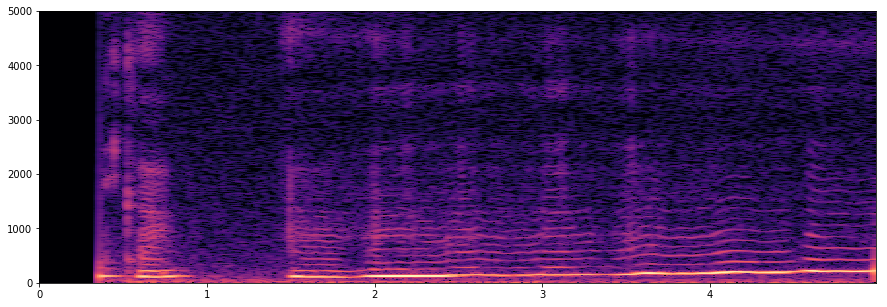

In [509]:
# plot:

# stft:
plt.figure(figsize=(15,5))
extent = np.concatenate([x['stft']['t'][[0, -1]], x['stft']['f'][[0, -1]]])
plt.imshow(x['stft']['s'], origin='lower', aspect='auto', cmap=cmap_spec, extent=extent)
plt.ylim([0, 5000])
plt.show()



## View Example

In [148]:
from IPython.display import Audio

In [149]:
Audio(x_wave, rate=f_s)

#### Time Domain: Raw Waveform

In [150]:
import numpy as np
import matplotlib.pyplot as plt

In [151]:
x_wave_example = x_wave
sample_rate = f_s

In [152]:
# parameters:

n_fft = 1024 # frame length

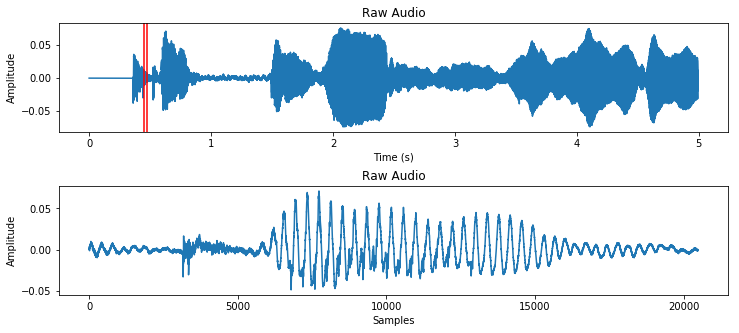

In [153]:
timesteps = np.arange(len(x_wave_example))/sample_rate

fig, ax = plt.subplots(2, figsize=(12, 5))
fig.subplots_adjust(hspace=0.5)

ax[0].plot(timesteps, x_wave_example)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Raw Audio')

start = 20000
stop = start+20*n_fft
x = x_wave_example[start:stop]

ax[0].axvline(start/sample_rate, c='r') 
ax[0].axvline((start+n_fft)/sample_rate, c='r')

ax[1].plot(x)
ax[1].set_xlabel('Samples')
ax[1].set_ylabel('Amplitude')
ax[1].set_title('Raw Audio');

#### Frequency Domain: Short-Time Fourier Transform

In [154]:
# parameters:

n_fft = 1024 # frame length
hop_length = 512

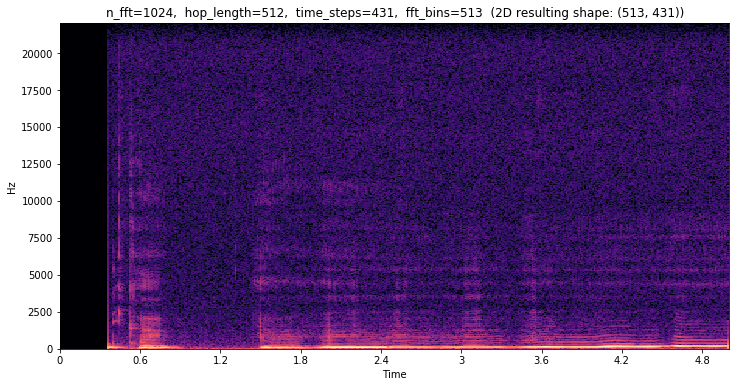

In [155]:
x_stft_example = utils.trans.wave_to_stft(x_wave_example, 
                              n_fft=n_fft, hop_length=hop_length, sample_rate=sample_rate, 
                              plot_flag=True)

#### Frequency Domain: Log-Mel Spectrogram

In [516]:
# parameters:

n_fft = 4096
hop_length = 512

fmin = 0
fmax = 10000
n_mels = (6*64)

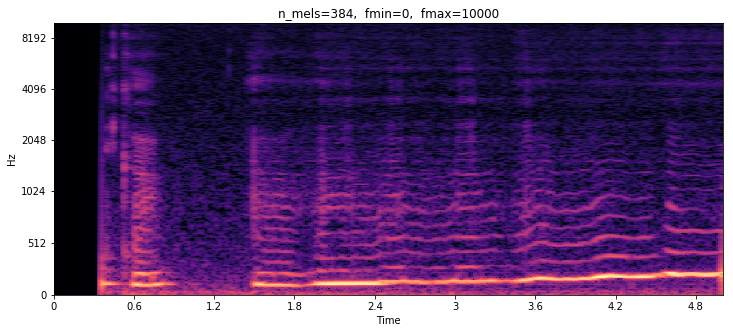

In [517]:
x_mel_example = utils.trans.wave_to_mel(x_wave_example, 
                            n_fft=n_fft, hop_length=hop_length, sample_rate=sample_rate, 
                            fmin=fmin, fmax=fmax, n_mels=n_mels, 
                            plot_flag=True)